# Project Description: 
### Analysis of Blog Authorship Corpus and Classification


### Analysis of Blog Authorship Corpus and Classification

####	1. Load the dataset (5 points)

In [0]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt 

In [2]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [0]:
df = pd.read_csv('/drive/My Drive/Colab Notebooks/SNLP/blogtext.csv')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
id        681284 non-null int64
gender    681284 non-null object
age       681284 non-null int64
topic     681284 non-null object
sign      681284 non-null object
date      681284 non-null object
text      681284 non-null object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


There are total 681284 records are there and no null values in the data.

In [6]:
df.drop_duplicates(subset="text",inplace=True)
df.shape

(611652, 7)

In [7]:
df.text.str.len().describe()

count    611652.000000
mean       1163.233872
std        2419.298950
min           4.000000
25%         250.000000
50%         676.000000
75%        1459.000000
max      790123.000000
Name: text, dtype: float64

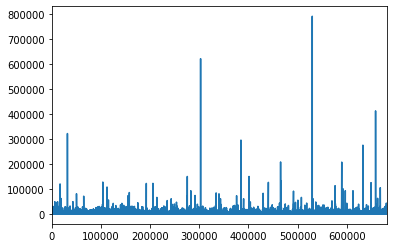

In [8]:
df.text.str.len().plot()

From the above diagram it looks like some  tweets have abnormally excessive no of words/characters, so we need to decide on limiting the length of the tweets. 

In [9]:
print(df.topic.value_counts())

indUnk                     230835
Student                    136051
Technology                  34430
Education                   28477
Arts                        26387
Communications-Media        19037
Internet                    15545
Non-Profit                  13029
Engineering                 10573
Law                          8701
Publishing                   7248
Science                      6500
Government                   6139
Consulting                   5339
Fashion                      4545
Marketing                    4508
Religion                     4503
Advertising                  4446
BusinessServices             4251
Accounting                   3672
Telecommunications           3670
Military                     2995
Banking                      2893
Sports-Recreation            2747
Chemicals                    2455
HumanResources               2354
RealEstate                   2327
Transportation               2143
Manufacturing                2008
Museums-Librar

Maximum no of posts are on "indunk" and least no of posts on the topic Maritime

In [10]:
print(df.id.value_counts())

449628     4167
589736     2288
958176     2240
303162     2111
942828     2068
           ... 
3741966       1
705633        1
3343527       1
3337329       1
4327103       1
Name: id, Length: 18981, dtype: int64


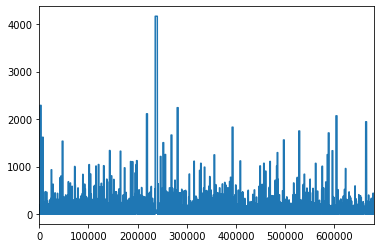

In [11]:
df.groupby("id")["id"].transform("count").plot()

In [12]:
# Looks like some users have more frequent posts, so trying to remove the users with more than 150 posts, to avoid the bias
df = df.loc[df.groupby("id")["id"].transform("count")<150]
df.describe()

,id,age
count,3.507630e+05,350763.000000
mean,3.063872e+06,23.176213
std,1.000698e+06,7.715171
min,7.596000e+03,13.000000
25%,2.608756e+06,16.000000
50%,3.424891e+06,23.000000
75%,3.763415e+06,26.000000
max,4.337650e+06,48.000000


In [13]:
df.apply(lambda x: x.strip() if isinstance(x, str) else x).tail(100)


,id,gender,age,topic,sign,date,text
681061,3661649,female,13,Student,Pisces,"21,July,2004",urlLink he awake.. 'HuH?....
681062,3661649,female,13,Student,Pisces,"21,July,2004",urlLink this is another p...
681063,3661649,female,13,Student,Pisces,"21,July,2004",urlLink JuaN ThouGht:'OmG...
681064,3661649,female,13,Student,Pisces,"21,July,2004",urlLink *StaRt* JuaN Saw ...
681065,3661649,female,13,Student,Pisces,"21,July,2004",WuppZz!! i press the enter bu...
...,...,...,...,...,...,...,...
681156,4260903,female,34,indUnk,Virgo,"23,August,2004",I ran around cleaning all mor...
681157,4260903,female,34,indUnk,Virgo,"21,August,2004",We just got back from Six Fla...
681158,4260903,female,34,indUnk,Virgo,"19,August,2004",urlLink I felt kind of ...
681159,4260903,female,34,indUnk,Virgo,"18,August,2004","Wow, I love fruit. I read th..."


In [0]:
#Normalizing the data by considering only the posts that are having minimum 7 characters and maximum 18000 characters
df = df.loc[(df.text.str.len() < 18000) & (df.text.str.len() > 7)]

In [15]:
df["text"]=df["text"].replace('&nbsp;'," ")

df.shape

(350247, 7)

In [16]:
df[df.text.str.len() < 30].tail()

,id,gender,age,topic,sign,date,text
678269,3734848,male,27,Student,Cancer,"23,June,2004","Hello, world!"
678551,3173282,female,17,Student,Leo,"25,May,2004",it's true.
678919,3527397,male,46,Technology,Taurus,"09,June,2004",BOOGA BOOGA
678931,3527397,male,46,Technology,Taurus,"09,July,2004",BLOGG!!!
679763,4147130,male,33,indUnk,Capricorn,"16,August,2004",this one - hello


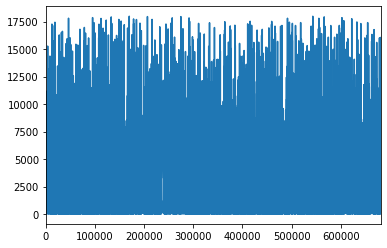

In [17]:
df.shape
df.text.str.len().plot()

In [0]:
df["word_count"] = df.text.str.split().str.len()

In [19]:
df.head(10)

,id,gender,age,topic,sign,date,text,word_count
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...",28
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...,20
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!,2
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,65
5,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",I had an interesting conversation...,662
6,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Somehow Coca-Cola has a way of su...,196
7,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004","If anything, Korea is a country o...",387
8,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Take a read of this news article ...,386
9,3581210,male,33,InvestmentBanking,Aquarius,"09,June,2004",I surf the English news sites a l...,160
10,3581210,male,33,InvestmentBanking,Aquarius,"09,June,2004","Ah, the Korean language...it look...",296


In [20]:
df["age_group"] = pd.qcut(df["age"],3,precision=0,)
df.age_group.value_counts()

(12.0, 17.0]    136353
(17.0, 25.0]    110531
(25.0, 48.0]    103363
Name: age_group, dtype: int64

In [21]:
df.text

0                    Info has been found (+/- 100 pages,...
1                    These are the team members:   Drewe...
3                          testing!!!  testing!!!          
4                      Thanks to Yahoo!'s Toolbar I can ...
5                      I had an interesting conversation...
                                ...                        
681156                     I ran around cleaning all mor...
681157                     We just got back from Six Fla...
681158                      urlLink     I  felt kind of ...
681159                     Wow, I love fruit.  I read th...
681160                     I want to consider myself a r...
Name: text, Length: 350247, dtype: object

#### 2.	Preprocess rows of the “text” column (7.5 points)
    a.	Remove unwanted characters
    b.	Convert text to lowercase
    c.	Remove unwanted spaces
    d.	Remove stopwords


In [22]:
# Convert text to lowercase
df["text"] = df.text.str.lower()
df.head()

,id,gender,age,topic,sign,date,text,word_count,age_group
0,2059027,male,15,Student,Leo,"14,May,2004","info has been found (+/- 100 pages,...",28,"(12.0, 17.0]"
1,2059027,male,15,Student,Leo,"13,May,2004",these are the team members: drewe...,20,"(12.0, 17.0]"
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!,2,"(12.0, 17.0]"
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks to yahoo!'s toolbar i can ...,65,"(25.0, 48.0]"
5,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",i had an interesting conversation...,662,"(25.0, 48.0]"


In [23]:
#remove unwanted special characters
df.text=df.text.str.replace(r"[_:*~+%#@()>><<^!/\&]", "") 
df["word_count"] = df.text.str.split().str.len()
df.head()

,id,gender,age,topic,sign,date,text,word_count,age_group
0,2059027,male,15,Student,Leo,"14,May,2004","info has been found - 100 pages, an...",28,"(12.0, 17.0]"
1,2059027,male,15,Student,Leo,"13,May,2004",these are the team members drewes...,20,"(12.0, 17.0]"
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing,2,"(12.0, 17.0]"
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks to yahoo's toolbar i can n...,65,"(25.0, 48.0]"
5,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",i had an interesting conversation...,660,"(25.0, 48.0]"


In [24]:
pd.set_option('display.max_colwidth' , 100)
df['text'] = df['text'].str.replace( '[^\w\s]' , '' )
df['text'].head(10)

0                info has been found  100 pages and 45 mb of pdf files now i have to wait untill our t...
1                these are the team members   drewes van der laag           urllink mail  ruiyu xie   ...
3                                                                              testing  testing          
4                  thanks to yahoos toolbar i can now capture the urls of popupswhich means now i can ...
5                  i had an interesting conversation with my dad this morning  we were talking about w...
6                  somehow cocacola has a way of summing up things so well  in the early 1970s they ha...
7                  if anything korea is a country of extremes  everything here seems fadbased  i think...
8                  take a read of this news article from urllink joongang ilbo  about north koreas opi...
9                  i surf the english news sites a lot looking for tidbits on korea and how foreigners...
10                 ah the korean languageit lo

In [25]:
# Let's  remove the frequent words from the text; apart from the stopwords
# first we will take whole tweets data and split into words and then calculate their frequency
# join words only with strings so, there needs to be some string to join other string
all_words = ' '.join( df['text'] ).split()
frequency = pd.Series(all_words).value_counts()[:20]
print("frequency:", frequency)
# removing frequenct words
df['text'] =df['text'].apply( lambda t : ' '.join( word for word in t.split() 
                                                      if word not in frequency) )
df['text'].head(10)


frequency: the     2983542
i       2748255
to      2321352
and     2060080
a       1651354
of      1359775
that    1002621
in       989942
it       936733
my       898352
is       819664
for      701855
you      698100
was      689619
me       571740
on       547642
but      527936
so       523855
with     503604
this     502267
dtype: int64


0     info has been found 100 pages 45 mb pdf files now have wait untill our team leader has processed...
1     these are team members drewes van der laag urllink mail ruiyu xie urllink mail bryan aaldering u...
3                                                                                         testing testing
4     thanks yahoos toolbar can now capture urls popupswhich means now can show some cool links korean...
5     had an interesting conversation dad morning we were talking about where koreans put their money ...
6     somehow cocacola has way summing up things well early 1970s they had as their flagship jingle id...
7     if anything korea country extremes everything here seems fadbased think may come from koreas his...
8     take read news article from urllink joongang ilbo about north koreas opinion scaling down troops...
9     surf english news sites lot looking tidbits korea how foreigners like view hermit kingdom also a...
10    ah korean languageit looks difficult at 

In [26]:
# remove rare words
all_words = ' '.join(df['text'] ).split()
rarely = pd.Series(all_words).value_counts()[-160000:]
rarely.sort_values

df['text'] = df['text'].apply( lambda t : ' '.join( word for word in t.split() 
                                                      if word not in rarely) )
df['text'].head(10)

0     info has been found 100 pages 45 mb pdf files now have wait untill our team leader has processed...
1     these are team members drewes van der laag urllink mail ruiyu xie urllink mail bryan aaldering u...
3                                                                                         testing testing
4     thanks yahoos toolbar can now capture urls popupswhich means now can show some cool links korean...
5     had an interesting conversation dad morning we were talking about where koreans put their money ...
6     somehow cocacola has way summing up things well early 1970s they had as their flagship jingle id...
7     if anything korea country extremes everything here seems fadbased think may come from koreas his...
8     take read news article from urllink joongang ilbo about north koreas opinion scaling down troops...
9     surf english news sites lot looking tidbits korea how foreigners like view hermit kingdom also a...
10    ah korean languageit looks difficult at 

In [27]:
#Also remove the numerical values
import re

def remove_num(t):
    removed_num_text = re.sub(r'\d+', '', t)
    return removed_num_text

df['text'] = df['text'].apply( lambda t : remove_num(t) )
df['text'].head(10)

0     info has been found  pages  mb pdf files now have wait untill our team leader has processed lear...
1     these are team members drewes van der laag urllink mail ruiyu xie urllink mail bryan aaldering u...
3                                                                                         testing testing
4     thanks yahoos toolbar can now capture urls popupswhich means now can show some cool links korean...
5     had an interesting conversation dad morning we were talking about where koreans put their money ...
6     somehow cocacola has way summing up things well early s they had as their flagship jingle id lik...
7     if anything korea country extremes everything here seems fadbased think may come from koreas his...
8     take read news article from urllink joongang ilbo about north koreas opinion scaling down troops...
9     surf english news sites lot looking tidbits korea how foreigners like view hermit kingdom also a...
10    ah korean languageit looks difficult at 

In [28]:
#Lemmatization 
import nltk
nltk.download('wordnet')
from textblob import Word 

df['text'] =df['text'].apply( lambda t : " ".join( [Word(word).lemmatize() for word in t.split()  ]) )
df['text'].head(5)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0      info ha been found page mb pdf file now have wait untill our team leader ha processed learns html
1    these are team member drewes van der laag urllink mail ruiyu xie urllink mail bryan aaldering ur...
3                                                                                        testing testing
4    thanks yahoo toolbar can now capture url popupswhich mean now can show some cool link korean pop...
5    had an interesting conversation dad morning we were talking about where korean put their money i...
Name: text, dtype: object

In [29]:
#Remove stopwords
import nltk
nltk.download('stopwords')
import seaborn as sns
from nltk.corpus import stopwords
print(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

In [30]:
def remove_stopwords(word):
    if word not in stopwords.words('english'):
        return word
    else:
        return ' '
df['text'] = df.text.apply(remove_stopwords)

df["word_count"] = df.text.str.split().str.len()
df.head(10)


,id,gender,age,topic,sign,date,text,word_count,age_group
0,2059027,male,15,Student,Leo,"14,May,2004",info ha been found page mb pdf file now have wait untill our team leader ha processed learns html,19,"(12.0, 17.0]"
1,2059027,male,15,Student,Leo,"13,May,2004",these are team member drewes van der laag urllink mail ruiyu xie urllink mail bryan aaldering ur...,18,"(12.0, 17.0]"
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing,2,"(12.0, 17.0]"
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks yahoo toolbar can now capture url popupswhich mean now can show some cool link korean pop...,45,"(25.0, 48.0]"
5,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",had an interesting conversation dad morning we were talking about where korean put their money i...,457,"(25.0, 48.0]"
6,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",somehow cocacola ha way summing up thing well early s they had a their flagship jingle id like b...,135,"(25.0, 48.0]"
7,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",if anything korea country extreme everything here seems fadbased think may come from korea histo...,276,"(25.0, 48.0]"
8,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",take read news article from urllink joongang ilbo about north korea opinion scaling down troop s...,280,"(25.0, 48.0]"
9,3581210,male,33,InvestmentBanking,Aquarius,"09,June,2004",surf english news site lot looking tidbit korea how foreigner like view hermit kingdom also a wa...,108,"(25.0, 48.0]"
10,3581210,male,33,InvestmentBanking,Aquarius,"09,June,2004",ah korean languageit look difficult at first then a figure out how read hanguel korea surprising...,196,"(25.0, 48.0]"


In [31]:
# Observed that some chinese words are there in the text.  Trying to remove the same
!pip install jieba
import jieba
jieba_stop_words = [
    '的', '了', '和', '是', '就', '都', '而', '及', '與', 
    '著', '或', '一個', '沒有', '我們', '你們', '妳們', 
    '他們', '她們', '是否','시스템','데이터를'  ,'تيتان'
]


def remove_stopwords_chinese(word):
    if word not in jieba_stop_words:
        return word
    else:
        return ' '
df['text'] = df.text.apply(remove_stopwords_chinese)

df["word_count"] = df.text.str.split().str.len()
df.head(10)

,id,gender,age,topic,sign,date,text,word_count,age_group
0,2059027,male,15,Student,Leo,"14,May,2004",info ha been found page mb pdf file now have wait untill our team leader ha processed learns html,19,"(12.0, 17.0]"
1,2059027,male,15,Student,Leo,"13,May,2004",these are team member drewes van der laag urllink mail ruiyu xie urllink mail bryan aaldering ur...,18,"(12.0, 17.0]"
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing,2,"(12.0, 17.0]"
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks yahoo toolbar can now capture url popupswhich mean now can show some cool link korean pop...,45,"(25.0, 48.0]"
5,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",had an interesting conversation dad morning we were talking about where korean put their money i...,457,"(25.0, 48.0]"
6,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",somehow cocacola ha way summing up thing well early s they had a their flagship jingle id like b...,135,"(25.0, 48.0]"
7,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",if anything korea country extreme everything here seems fadbased think may come from korea histo...,276,"(25.0, 48.0]"
8,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",take read news article from urllink joongang ilbo about north korea opinion scaling down troop s...,280,"(25.0, 48.0]"
9,3581210,male,33,InvestmentBanking,Aquarius,"09,June,2004",surf english news site lot looking tidbit korea how foreigner like view hermit kingdom also a wa...,108,"(25.0, 48.0]"
10,3581210,male,33,InvestmentBanking,Aquarius,"09,June,2004",ah korean languageit look difficult at first then a figure out how read hanguel korea surprising...,196,"(25.0, 48.0]"


#### 3. As we want to make this into a multi-label classification problem, you are required to merge all the label columns together, so that we have all the labels together for a particular sentence (7.5 points)
        a.Label columns to merge: “gender”, “age”, “topic”, “sign”
        b.After completing the previous step, there should be only two columns in your data frame i.e. “text” and “labels” as shown in the below image 


In [32]:
#Label columns to merge: “gender”, “age”, “topic”, “sign”

df["labels"]=df['gender'].astype(str) + "," +df['age'].astype(str)+ "," +df['topic'].astype(str) + "," +df['sign'].astype(str) 
df = df.drop(["id","gender","age","topic","sign","date","word_count","age_group"], axis=1)
df.head(10)

,text,labels
0,info ha been found page mb pdf file now have wait untill our team leader ha processed learns html,"male,15,Student,Leo"
1,these are team member drewes van der laag urllink mail ruiyu xie urllink mail bryan aaldering ur...,"male,15,Student,Leo"
3,testing testing,"male,15,Student,Leo"
4,thanks yahoo toolbar can now capture url popupswhich mean now can show some cool link korean pop...,"male,33,InvestmentBanking,Aquarius"
5,had an interesting conversation dad morning we were talking about where korean put their money i...,"male,33,InvestmentBanking,Aquarius"
6,somehow cocacola ha way summing up thing well early s they had a their flagship jingle id like b...,"male,33,InvestmentBanking,Aquarius"
7,if anything korea country extreme everything here seems fadbased think may come from korea histo...,"male,33,InvestmentBanking,Aquarius"
8,take read news article from urllink joongang ilbo about north korea opinion scaling down troop s...,"male,33,InvestmentBanking,Aquarius"
9,surf english news site lot looking tidbit korea how foreigner like view hermit kingdom also a wa...,"male,33,InvestmentBanking,Aquarius"
10,ah korean languageit look difficult at first then a figure out how read hanguel korea surprising...,"male,33,InvestmentBanking,Aquarius"


In [0]:
# #performing lemmatization to reduce the number of unique words 
# w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
# lemmatizer = nltk.stem.WordNetLemmatizer()

# def lemmatize_text(text):
#     return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]


In [0]:
# list(df_new['text'].str.split(' ', expand=True).stack().unique())
# df_new['text'].str.split(' ', expand=True).stack().value_counts()


#### 4.	Separate features and labels, and split the data into training and testing (5 points)

In [33]:
df.head()


,text,labels
0,info ha been found page mb pdf file now have wait untill our team leader ha processed learns html,"male,15,Student,Leo"
1,these are team member drewes van der laag urllink mail ruiyu xie urllink mail bryan aaldering ur...,"male,15,Student,Leo"
3,testing testing,"male,15,Student,Leo"
4,thanks yahoo toolbar can now capture url popupswhich mean now can show some cool link korean pop...,"male,33,InvestmentBanking,Aquarius"
5,had an interesting conversation dad morning we were talking about where korean put their money i...,"male,33,InvestmentBanking,Aquarius"


In [34]:
X = df.text
y =df.labels

# split the new DataFrame into training and testing sets [Default test size = 35%]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.35)
X_train.shape,X_test.shape

((227660,), (122587,))

#### 5.	Vectorize the features (5 points)
    a.	Create a Bag of Words using count vectorizer
        i.	Use ngram_range=(1, 2)
        ii.	Vectorize training and testing features
    b.	Print the term-document matrix


In [35]:
# use CountVectorizer to create document-term matrices from X_train and X_test
vect = CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,2),max_features=1000)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

print('BOW_cv_train:',X_train_dtm.shape)
print('BOW_cv_test:',X_test_dtm.shape)

BOW_cv_train: (227660, 1000)
BOW_cv_test: (122587, 1000)


In [36]:
df_dtm = pd.DataFrame(X_train_dtm.toarray(), columns=vect.get_feature_names())
print(df_dtm)

        aathadacanay  about radotic  abrahim  abrar  ...  تيتان  我想  데이터를  시스템
0                  0              0        0      0  ...      0   0     0    0
1                  0              0        0      0  ...      0   0     0    0
2                  0              0        0      0  ...      0   0     0    0
3                  0              0        0      0  ...      0   0     0    0
4                  0              0        0      0  ...      0   0     0    0
...              ...            ...      ...    ...  ...    ...  ..   ...  ...
227655             0              0        0      0  ...      0   0     0    0
227656             0              0        0      0  ...      0   0     0    0
227657             0              0        0      0  ...      0   0     0    0
227658             0              0        0      0  ...      0   0     0    0
227659             0              0        0      0  ...      0   0     0    0

[227660 rows x 1000 columns]


In [0]:
# nb = MultinomialNB()
# nb.fit(X_train_dtm, y_train)
# y_train_pred = nb.predict(X_train_dtm)
# y_pred_class = nb.predict(X_test_dtm)
# print('Train Accuracy for NB : ', metrics.accuracy_score(y_train,y_train_pred))
# print('Test Accuracy for NB: ', metrics.accuracy_score(y_test, y_pred_class))

In [0]:
df_test=df_dtm.head()
df_test.to_csv(r"./drive/My Drive/Colab Notebooks/SNLP/blogtext1.csv",index=False)

#### 6.	Create a dictionary to get the count of every label i.e. the key will be label name and value will be the total count of the label. Check below image for reference (5 points)

In [39]:
# features names
feature_names = vect.get_feature_names()
print(feature_names[50:500])


['bag douche', 'bahbahbahbah', 'banging banging', 'barisax pm', 'baronvz', 'bee official', 'been fortnight', 'begin sooncant', 'being resolute', 'ben yahweh', 'benji pm', 'bhu', 'big howie', 'big hugh', 'bigcolombian', 'billy budd', 'bimbo tramp', 'bitchin why', 'bite scum', 'blibble blibble', 'bln rupee', 'blondestlilchica', 'blookungfoo', 'blookungfoo am', 'blucrushed', 'blunav', 'board dariusmusiccom', 'bonceface', 'booher', 'borderbottomsolid', 'borderbottomsolid windowtext', 'borderleftnonemsoborderleftaltsolid', 'borderleftnonemsoborderleftaltsolid windowtext', 'bordertopnonemsobordertopaltsolid', 'bordertopnonemsobordertopaltsolid windowtext', 'bored upi', 'boredasaurus', 'bowiedavid', 'bowiedavid bowiedavid', 'boy curl', 'brandkim', 'bremelo', 'brennamonkey', 'brennamonkey am', 'britneyspears', 'brunette oh', 'bryin', 'bubblebutterfly', 'bulunan', 'bunkie', 'bunnyheadlike', 'bunnyheadlike say', 'caher', 'call mellow', 'canadian say', 'cancerleos', 'carab', 'cardragr', 'cardragr

In [40]:
y_train.head()

124671             female,35,Government,Capricorn
327594    female,26,Communications-Media,Aquarius
521763                        female,23,Law,Virgo
211324                    female,15,Education,Leo
16796                   male,16,Student,Capricorn
Name: labels, dtype: object

In [41]:
len(y_train)

227660

In [42]:
dict = {}
dict = y_train.apply(lambda x : pd.value_counts(x.split(","))).sum(axis = 0).to_dict()
print (dict)

{'Government': 2983.0, '35': 4469.0, 'female': 114928.0, 'Capricorn': 16548.0, 'Communications-Media': 6503.0, 'Aquarius': 17423.0, '26': 17039.0, 'Law': 2471.0, 'Virgo': 20941.0, '23': 25891.0, 'Leo': 19765.0, '15': 18969.0, 'Education': 12220.0, 'male': 112732.0, '16': 24121.0, 'Student': 57422.0, '17': 28009.0, 'Libra': 19684.0, 'indUnk': 78013.0, '13': 6068.0, 'Taurus': 19912.0, '33': 5842.0, '25': 21537.0, 'Technology': 11510.0, 'Arts': 9612.0, 'Scorpio': 18559.0, 'Military': 1599.0, '24': 24187.0, 'Gemini': 19038.0, 'Consulting': 2100.0, '27': 15105.0, 'Sagittarius': 18417.0, 'Accounting': 1091.0, '34': 4778.0, 'Cancer': 19771.0, '41': 1821.0, 'Automotive': 524.0, '14': 11511.0, '43': 1531.0, 'Aries': 19438.0, '36': 3298.0, 'Science': 2455.0, 'Engineering': 4245.0, 'Biotech': 668.0, '38': 1927.0, 'Pisces': 18164.0, 'Publishing': 2103.0, 'Non-Profit': 4501.0, 'Telecommunications': 1208.0, 'Internet': 5499.0, '44': 723.0, 'Fashion': 894.0, '42': 1083.0, 'Advertising': 1556.0, 'Arch

#### 7.	 Transform the labels - (7.5 points)

#### 8. Choose a classifier - (5 points)

In this task, we suggest using the One-vs-Rest approach, which is implemented in OneVsRestClassifier class. In this approach k classifiers (= number of tags) are trained. As a basic classifier, use LogisticRegression. It is one of the simplest methods, but often it performs good enough in text classification tasks. It might take some time because the number of classifiers to train is large.
a.	Use a linear classifier of your choice, wrap it up in OneVsRestClassifier to train it on every label
b.	As One-vs-Rest approach might not have been discussed in the sessions, we are providing you the code for that

#### 9.	Fit the classifier, make predictions and get the accuracy (5 points)

In [0]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y_train_mlb = mlb.fit_transform(y_train)
y_test_mlb = mlb.transform(y_test)

In [0]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(solver = 'lbfgs',random_state= 111)
LR
clf = OneVsRestClassifier(LR)
names = vect.get_feature_names()

a.	Print the following
i.	Accuracy score
ii.	F1 score
iii.	Average precision score
iv.	Average recall score
v.	Tip: Make sure you are familiar with all of them. How would you expect the things to work for the multi-label scenario? Read about micro/macro/weighted averaging


In [45]:
y_train_mlb
clf.fit(X_train_dtm,y_train_mlb)
%time
y_pred_clf = clf.predict(X_test_dtm)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


In [46]:
print(metrics.accuracy_score(y_test_mlb,y_pred_clf))

0.00012236207754492729


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test_mlb, y_pred_clf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    122587
           1       0.00      0.00      0.00      7349
           2       0.00      0.00      0.00       801
           3       0.93      0.00      0.00     48635
           4       0.92      0.00      0.00     56578
           5       1.00      0.00      0.00     31463
           6       1.00      0.00      0.00     27549
           7       1.00      0.00      0.00     24921
           8       0.67      0.00      0.00     24113
           9       0.83      0.00      0.00     25226
          10       0.00      0.00      0.00      1506
          11       0.00      0.00      0.00       948
          12       1.00      0.00      0.00     26422
          13       0.00      0.00      0.00      2486
          14       0.83      0.00      0.00     23883
          15       0.00      0.00      0.00      9345
          16       0.00      0.00      0.00       497
          17       0.00    

#### 10. Print true label and predicted label for any five examples (7.5 points)

In [48]:
metrics.average_precision_score(y_test_mlb, y_pred_clf,average='micro')
#metrics.recall_score(y_test_mlb, y_pred_clf)
metrics.recall_score(y_test_mlb, y_pred_clf, labels=None, pos_label=1, average='micro', sample_weight=None)

0.501730715360708

In [49]:
y_pred_clf[10:15]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0]])

In [50]:
y_test_mlb[10:15]

array([[1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
        0, 0, 1, 1, 1, 0, 0, 0],
       [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
        0, 1, 0, 1, 1, 0, 0, 0],
       [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 1, 0, 1, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
        0, 1, 0, 1, 1, 0, 0, 0]])